In [1]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('../img/1.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_blur = cv2.GaussianBlur(img_rgb, (5,5), 100)
img_blur = cv2.resize(img_blur, (256, 256))

In [3]:
bgm_model = KMeans(n_clusters=10).fit(img_blur.reshape((-1,3)))

/home/tom/miniconda3/envs/cv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


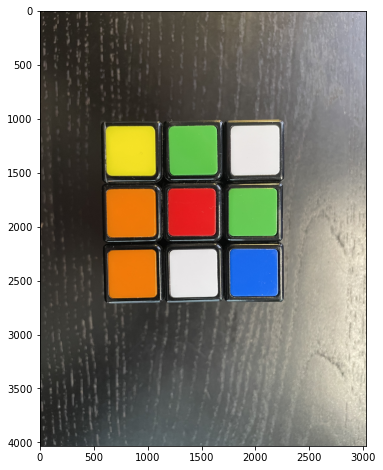

In [4]:
plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.show()

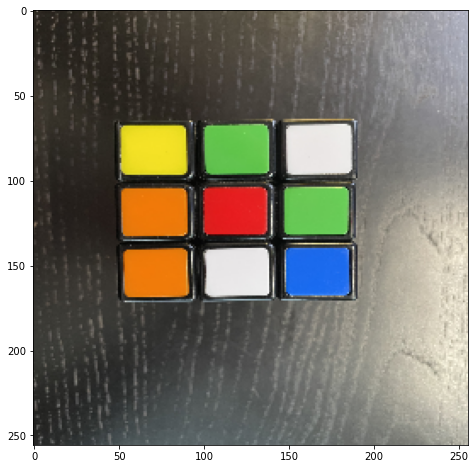

In [5]:
plt.figure(figsize=(8,8))
plt.imshow(img_blur)
plt.show()

In [6]:
img_blur_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
contours, heirarchy = cv2.findContours(img_blur_grey, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img_blur_grey, contours, -1, (0, 255, 0), 3)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

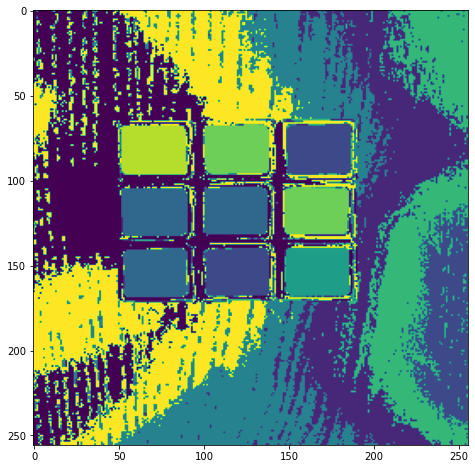

In [7]:
bgm_labels = bgm_model.predict(img_blur.reshape((-1,3)))
segments = bgm_labels.reshape(img_blur.shape[0], img_blur.shape[1])

plt.figure(figsize=(8,8))
plt.imshow(segments)
plt.show()

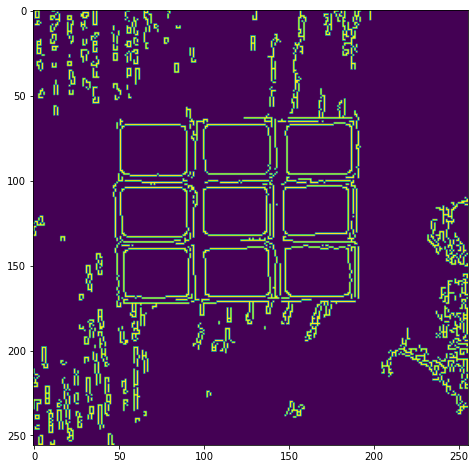

In [8]:
edges = cv2.Canny(img_blur, 50, 200, 255)
plt.figure(figsize=(8,8))
plt.imshow(edges)
plt.show()

In [9]:
conts, heir = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
conts_sorted =  sorted(conts, key=cv2.contourArea, reverse=True)

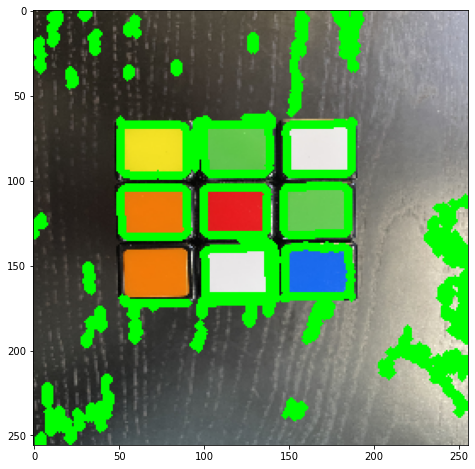

In [10]:
img_copy = img_blur.copy()
_ = cv2.drawContours(img_copy, conts_sorted[:50], -1, (0,255,0), 3)

plt.figure(figsize=(8,8))
plt.imshow(img_copy)
plt.show()